In [169]:
import numpy as np
from matplotlib import pyplot as plt, ticker as mticker
import matplotlib as mpl
from scipy.integrate import quad

sys.path.append('../Numerical_methods')
from matrix_calculator import A_matrix
from scheme_calculator import forward_backward

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}
mpl.rc('font', **font)

In [170]:
N = 1001
x_i = 0.001
x_f = 100
x = np.linspace(x_i, x_f, N)
Δx = x[1] - x[0]
ΔT = 1

In [171]:
# Inital surface density:
def Σ_initial(r, γ = 1):
    return (3 * np.pi * r**γ)**(-1) * np.exp(-r**(2 - γ))

In [172]:
C = 1 / quad(Σ_initial, x_i, x_f)[0]
print(C)

1.4885444784809072


In [173]:
def Σ_initial_norm(r, γ = 1):
    return C * Σ_initial(r, γ)

In [174]:
quad(Σ_initial_norm, x_i, x_f)

(1.0, 1.190870400683877e-11)

#### Self similar solution for $\nu \propto r^γ$

In [175]:
# Analytical soltuion:
def Σ(r, T, γ = 1):
    not_norm = lambda r : (3 * np.pi * r**γ)**(-1) * T**(-(5/2 - γ) / (2 - γ)) * np.exp(-r**(2 - γ) / T)
    #C = 1 / quad(not_norm, x_i, x_f)[0]
    return C * not_norm(r)

In [176]:
quad(lambda r: Σ(r, 1), x_i, x_f)[0]

1.0

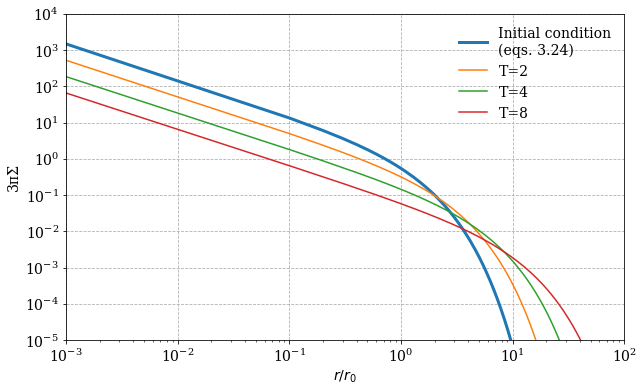

In [179]:
times = [2, 4, 8]
fig, axs = plt.subplots(figsize=(10,6))
plt.grid(ls='--')

axs.loglog(x, 3 * np.pi * Σ_initial_norm(x), label='Initial condition\n(eqs. 3.24)', lw=3)

for T in times:
    axs.loglog(x, 3 * np.pi * Σ(x, T), label=f'T={T}')
plt.legend(frameon = False)

axs.set(xlabel='$r/r_0$', ylabel='3πΣ', ylim = (1e-5, 1e4), xlim = (x_i, x_f), yticks = np.logspace(-5, 4, 10), xticks = np.logspace(-3, 2, 6));

